In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [85]:
df = pd.read_csv("vgsales.csv")




df = df[df.NA_Sales >= 0.1].dropna()
df = df[df.EU_Sales >= 0.1].dropna()
df = df[df.JP_Sales >= 0.1].dropna()
df = df[df.Other_Sales >= 0.5].dropna()
df = df[df.Global_Sales >= 0.5].dropna()

print(df)


"""Loading the dataset and cleaning the data(removing the null values)"""

      Rank                         Name Platform    Year         Genre  \
0        1                   Wii Sports      Wii  2006.0        Sports   
1        2            Super Mario Bros.      NES  1985.0      Platform   
2        3               Mario Kart Wii      Wii  2008.0        Racing   
3        4            Wii Sports Resort      Wii  2009.0        Sports   
4        5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
...    ...                          ...      ...     ...           ...   
382    383                    Far Cry 3      PS3  2012.0       Shooter   
413    414           Gran Turismo (PSP)      PSP  2009.0        Racing   
417    418                   L.A. Noire      PS3  2011.0     Adventure   
577    578  Pac-Man: Adventures in Time      PSP  2006.0      Fighting   
1180  1182    Pro Evolution Soccer 2010      PS2  2009.0        Sports   

                         Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                         Nint

'Loading the dataset and cleaning the data(removing the null values)'

In [3]:
print(df.dtypes)
df_num = df.select_dtypes(include = ['float64','int64'])
df_cat = df.select_dtypes(include = ["O"])
del df_cat["Name"]
del df_cat["Publisher"]
print(df_num.columns)
print(df_cat.columns)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')
Index(['Platform', 'Genre'], dtype='object')


In [87]:
df_pf = df_cat["Platform"].value_counts() 
df_g = df_cat["Genre"].value_counts() 
print(df_pf)
print(df_g)
print(sum(df_pf))
print(sum(df_g))

PS3     37
DS      15
PS2     14
Wii     14
PS4     13
X360     8
3DS      5
PSP      5
GB       5
PS       4
SNES     1
NES      1
WiiU     1
GBA      1
Name: Platform, dtype: int64
Action          29
Shooter         24
Role-Playing    16
Sports          12
Platform        12
Racing          11
Misc             9
Fighting         5
Puzzle           3
Simulation       2
Adventure        1
Name: Genre, dtype: int64
124
124


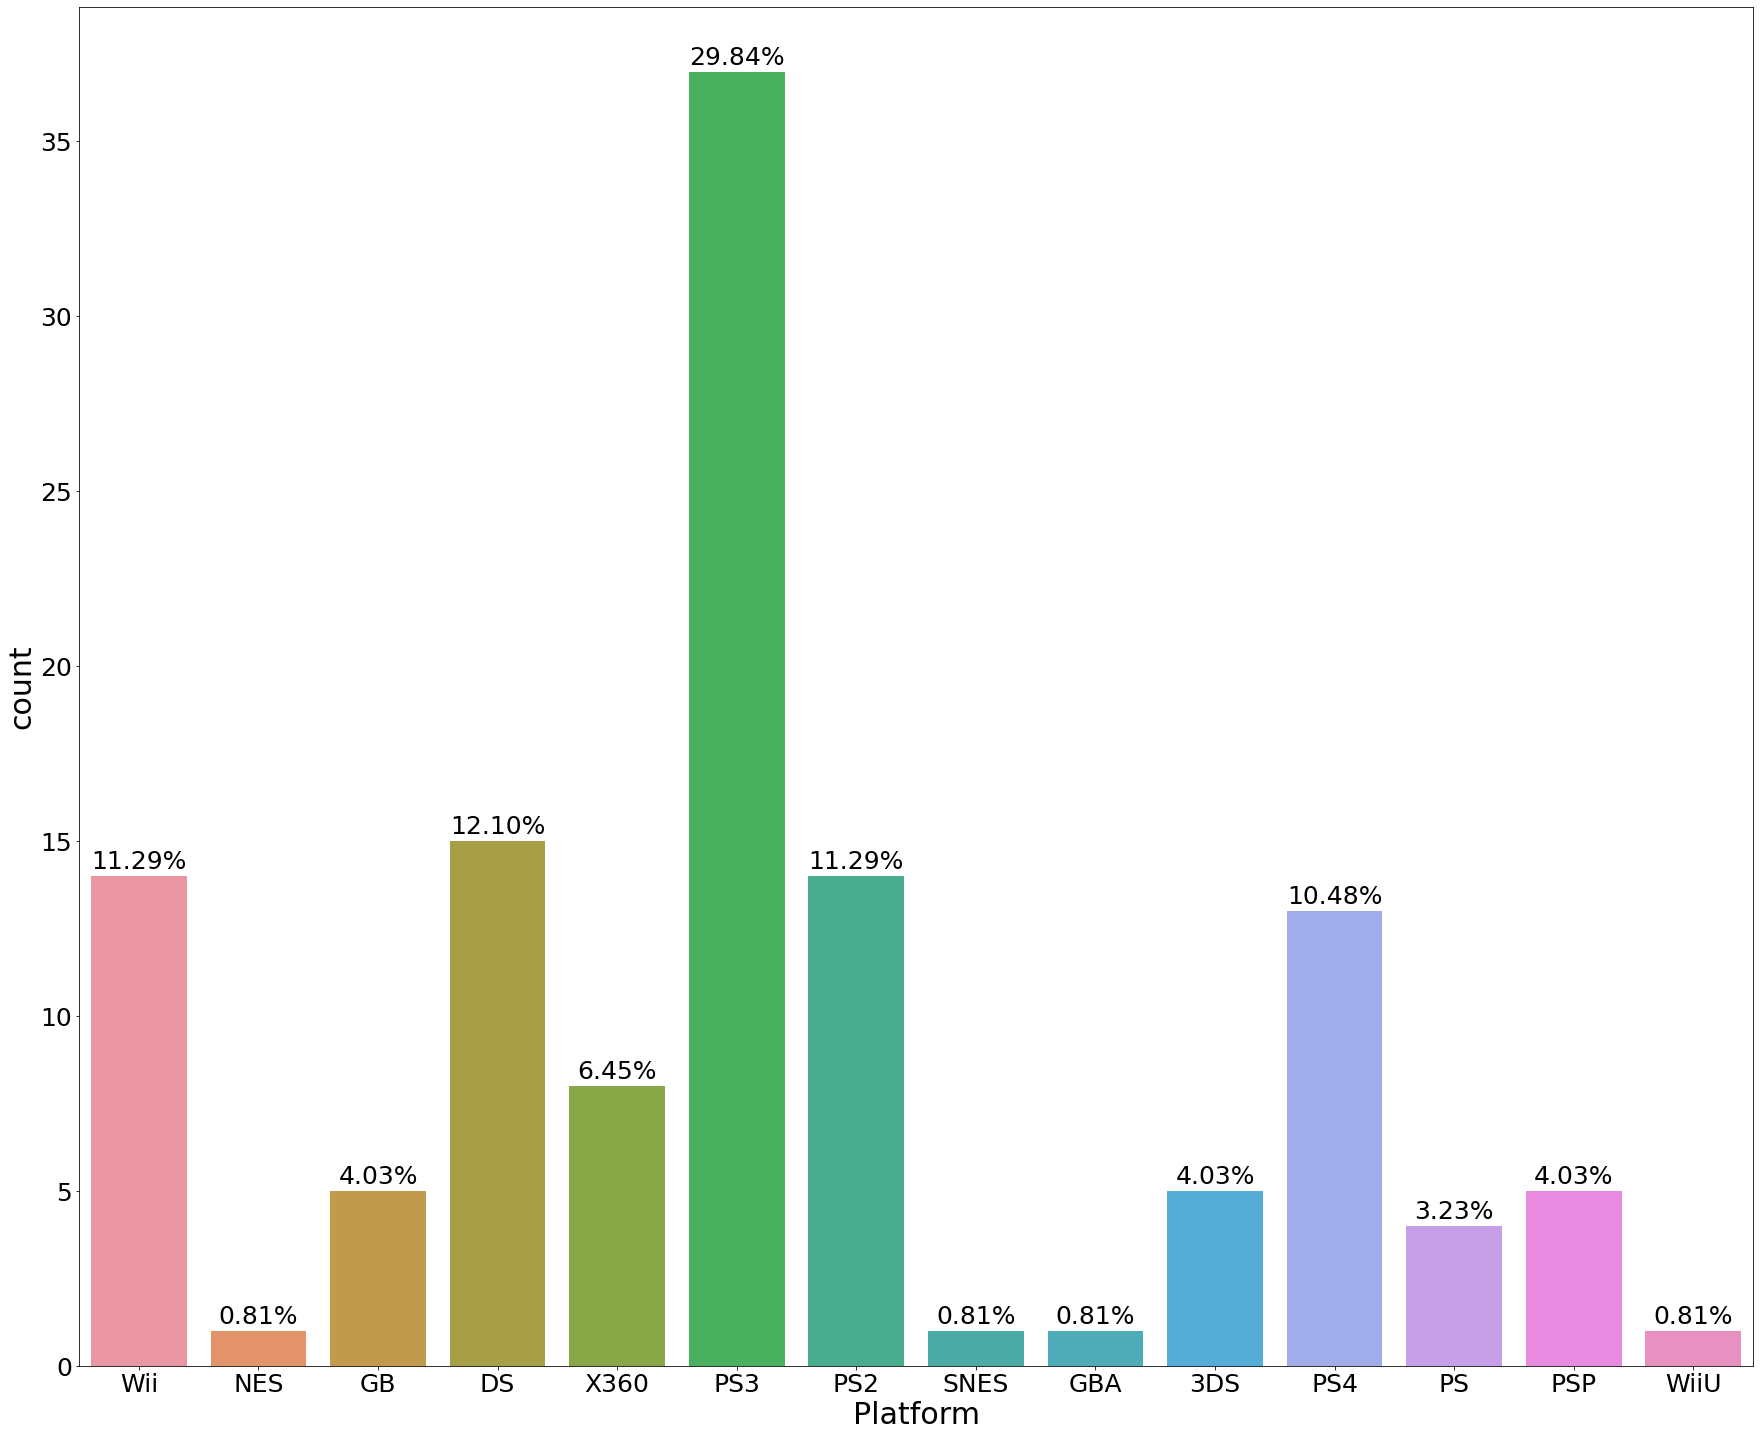

'Count and percentage of each unique value in the Platform feature is shown. As we can see above PS2,PS3,DS and Wii contribute 50% which tells video games are played maximum on these platforms compared to the rest. '

In [91]:
df_pf_per = df_cat["Platform"].value_counts(normalize = True) * 100
params = {'axes.titlesize':'35',
          'xtick.labelsize':'25',
          'ytick.labelsize':'25'}
plt.rcParams.update(params)
plt.figure(figsize = (30,25))
plt.xlabel("Platform", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
ax = sns.countplot(x="Platform", data=df_cat) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.2 ,
            '{:1.2%}'.format(height/124),
            ha="center" , fontsize = 25)
plt.show()

"""Count and percentage of each unique value in the Platform feature is shown. As we can see above PS2,PS3,DS and Wii contribute 50% to the dataset from which we can predict video games are played maximum on these platforms compared to the rest. """

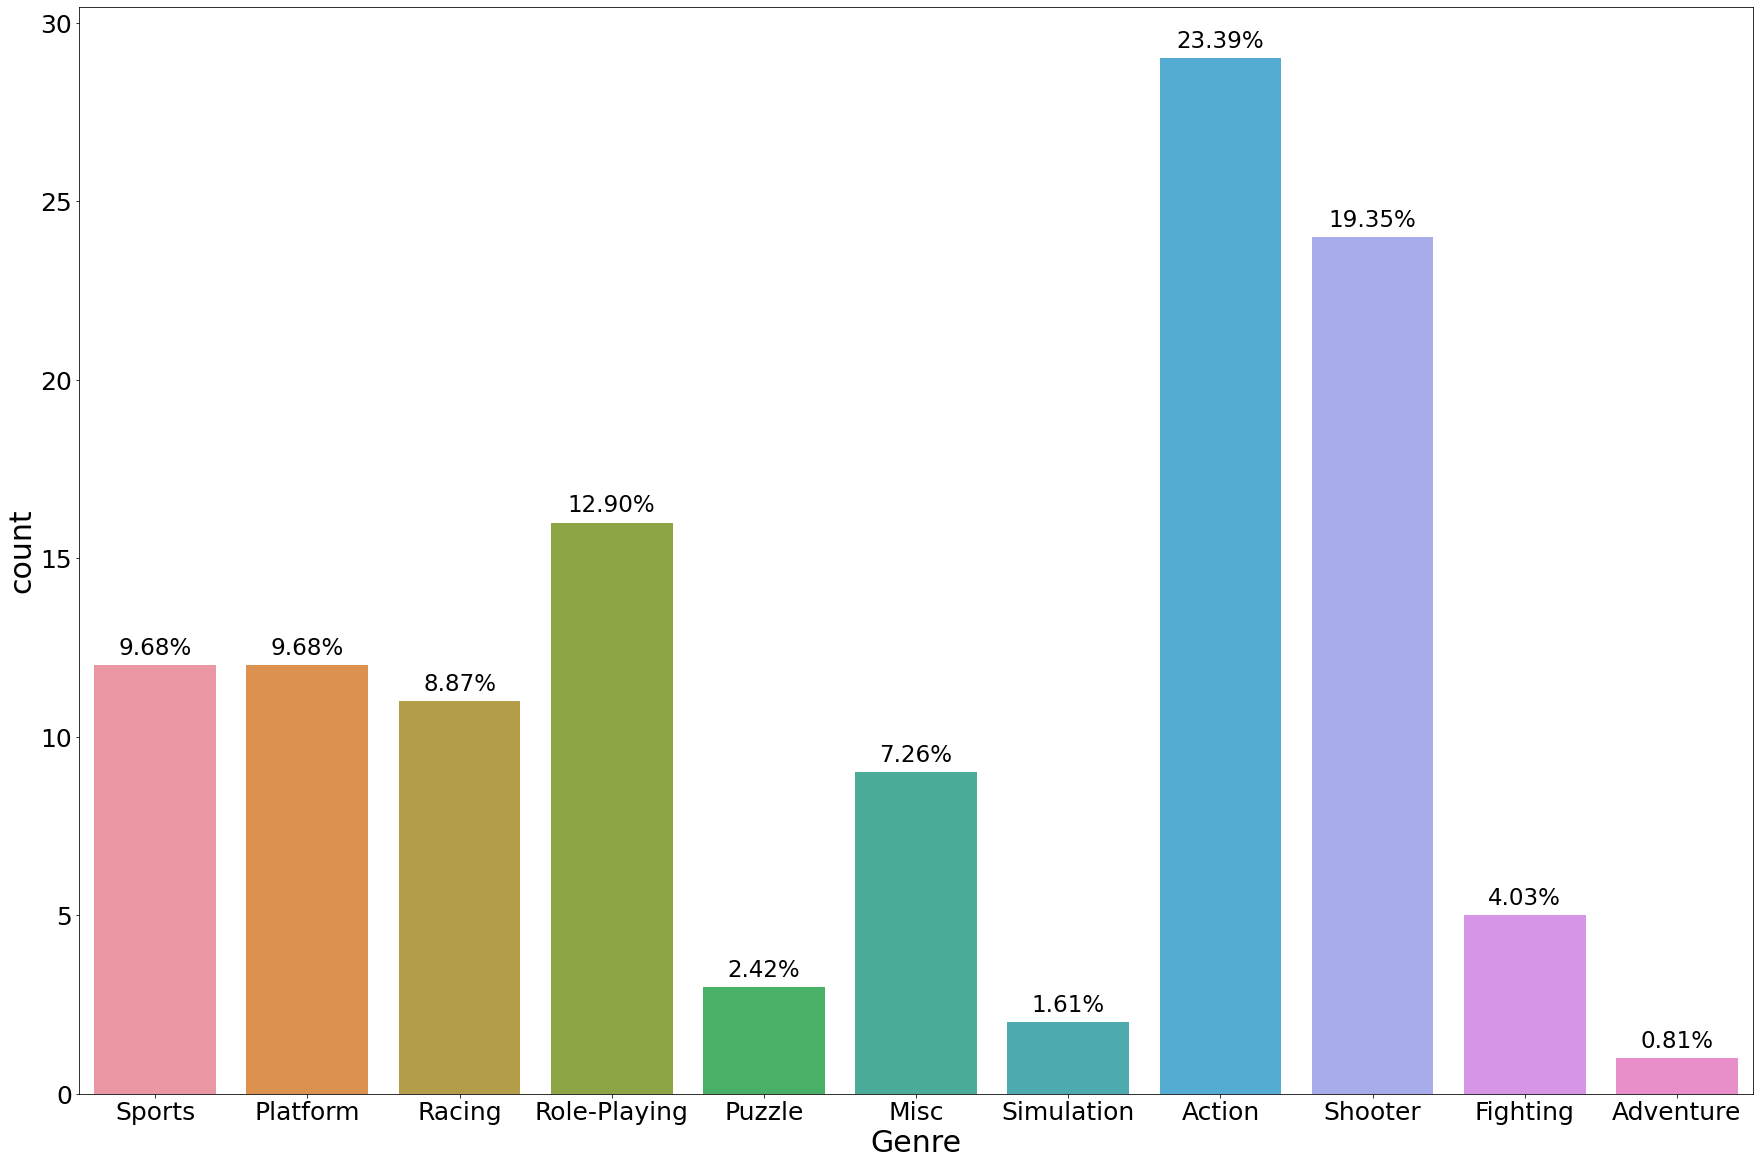

'Count and percentage of each unique value in the Genre feature is shown. As we can see above Action,Shooter,Role-playing,Sports and Platform contribute 50% which tells most users prefer these genres over the rest. '

In [92]:
df_g_per = df_cat["Genre"].value_counts(normalize = True) * 100
params = {'axes.titlesize':'35',
          'xtick.labelsize':'25',
          'ytick.labelsize':'25'}
plt.rcParams.update(params)
plt.figure(figsize = (30,20))
plt.xlabel("Genre", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
ax = sns.countplot(x="Genre", data=df_cat) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2%}'.format(height/124),
            ha="center" , fontsize = 23)
plt.show()

"""Count and percentage of each unique value in the Genre feature is shown. As we can see above Action,Shooter,Role-playing,Sports and Platform contribute 50% to the dataset from which we can tell most users prefer these genres over the rest. """

In [95]:
df_genre = pd.DataFrame()
df_genre = df[(df["Genre"] == "Action") | (df["Genre"] == "Shooter") | (df["Genre"] == "Platform") | (df["Genre"] == "Role-Playing")]
df_genre = df_genre.drop(columns =["Rank","Name","Publisher","Year","Platform"])
print(df_genre)
df_sales_gg = df_genre["Global_Sales"]
df_sales_g = df_genre.drop(columns = ["Genre","Global_Sales"])

df_pf = pd.DataFrame()
df_pf = df[(df["Platform"] == "DS") | (df["Platform"] == "PS2") | (df["Platform"] == "PS3") | (df["Platform"] == "Wii")]
df_pf = df_pf.drop(columns =["Rank","Name","Publisher","Year","Genre"])
print(df_pf)
df_sales_pfg = df_pf["Global_Sales"]
df_sales_pf = df_pf.drop(columns = ["Platform","Global_Sales"])
"""In the above data displayed the dataset is sorted in such a way that the sales of each genre and platform that contributes to 50% respectively are picked up"""

            Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
1        Platform     29.08      3.58      6.81         0.77         40.24
4    Role-Playing     11.27      8.89     10.22         1.00         31.37
6        Platform     11.38      9.23      6.50         2.90         30.01
8        Platform     14.59      7.06      4.70         2.26         28.62
12   Role-Playing      9.00      6.18      7.20         0.71         23.10
..            ...       ...       ...       ...          ...           ...
326      Platform      1.40      1.40      0.10         0.87          3.77
331  Role-Playing      0.96      2.00      0.21         0.56          3.73
336       Shooter      1.30      1.51      0.27         0.61          3.69
351       Shooter      1.28      1.61      0.15         0.57          3.61
382       Shooter      0.88      1.75      0.10         0.72          3.45

[81 rows x 6 columns]
     Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     

'In the above data displayed the dataset is sorted in such a way that the sales of each genre and platform that contributes to 50% respectively are picked up'

'In the below plots we see the contribution of each genre in each of the sales respectively'

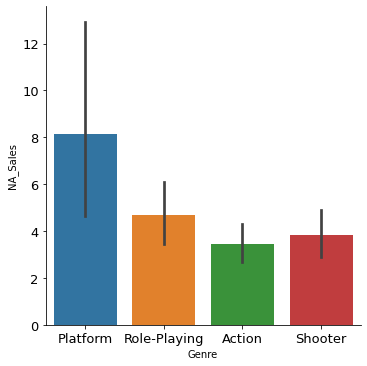

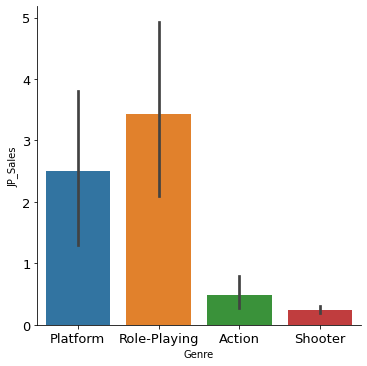

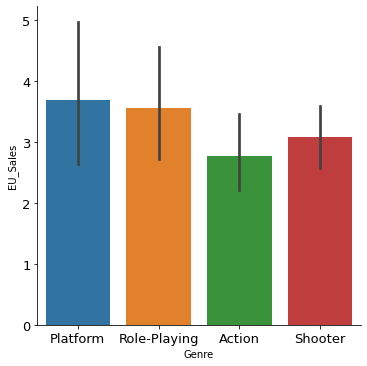

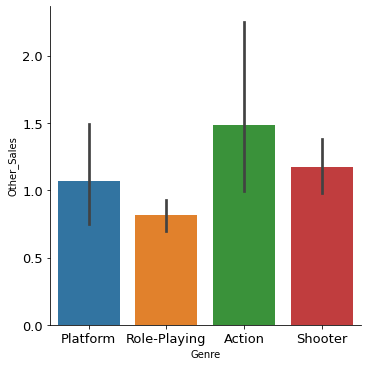

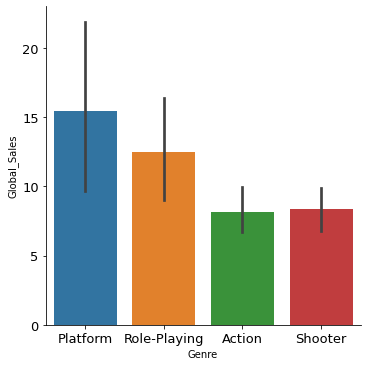

In [98]:
params = {'axes.titlesize':'25',
          'xtick.labelsize':'13',
          'ytick.labelsize':'13'}
plt.rcParams.update(params)
sns.catplot(x="Genre", y="NA_Sales", kind="bar", data=df_genre)


params = {'axes.titlesize':'30',
          'xtick.labelsize':'13',
          'ytick.labelsize':'13'}
plt.rcParams.update(params)
ax = sns.catplot(x="Genre", y="JP_Sales", kind="bar", data=df_genre)


            
params = {'axes.titlesize':'30',
          'xtick.labelsize':'13',
          'ytick.labelsize':'13'}
plt.rcParams.update(params)
sns.catplot(x="Genre", y="EU_Sales", kind="bar", data=df_genre)
            
            
params = {'axes.titlesize':'30',
          'xtick.labelsize':'13',
          'ytick.labelsize':'13'}
plt.rcParams.update(params)
sns.catplot(x="Genre", y="Other_Sales", kind="bar", data=df_genre)


params = {'axes.titlesize':'30',
          'xtick.labelsize':'13',
          'ytick.labelsize':'13'}
plt.rcParams.update(params)
sns.catplot(x="Genre", y="Global_Sales", kind="bar", data=df_genre)

""" This is a plot that shows the correlation between every numerical feature in the data set. Lighter the shade stronger the reltionship between the variables. And from the below plot we can see that Global_sales is correlated with NA_sales and EU_sales strongly which implies these two features affect the global_sales most.On the other hand the release year has no correlation at all where as the JP_sales and Other_sales affect the Global_sales slightly. We cannot ignore the JP_sales and Other_sales completely as sometimes they might end up changing the statistics completely."""  """ This is a plot that shows the correlation between every numerical feature in the data set. Lighter the shade stronger the reltionship between the variables. And from the below plot we can see that Global_sales is correlated with NA_sales and EU_sales strongly which implies these two features affect the global_sales most.On the other hand the release year has no correlation at all where as the JP_sales and Other_sales affect the Global_sales slightly. We cannot ignore the JP_sales and Other_sales completely as sometimes they might end up changing the statistics completely."""  

'In the below plots we see the contribution of each platform in each of the sales respectively. The line ends that cuts through each of the bins in the plots give us the information about the minimum and maximum value of the sales of that bin. '

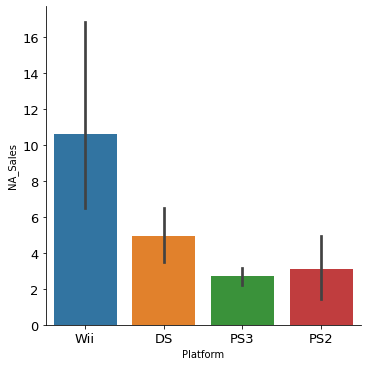

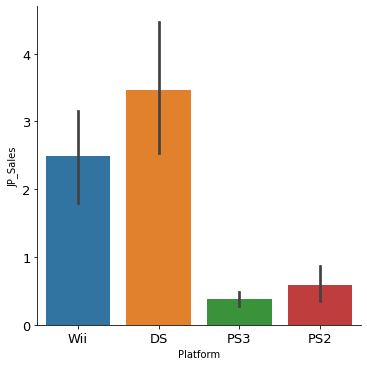

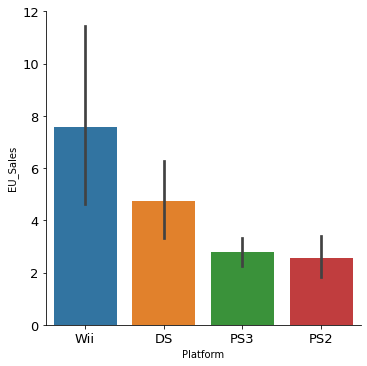

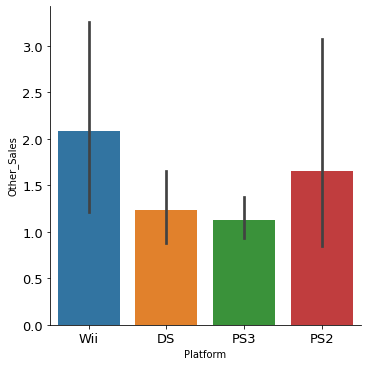

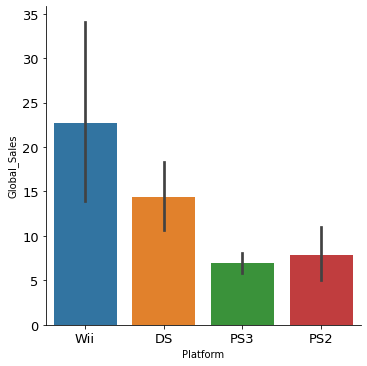

In [99]:
params = {'axes.titlesize':'25',
          'xtick.labelsize':'13',
          'ytick.labelsize':'13'}
plt.rcParams.update(params)
sns.catplot(x="Platform", y="NA_Sales", kind="bar", data=df_pf)

params = {'axes.titlesize':'30',
          'xtick.labelsize':'13',
          'ytick.labelsize':'13'}
plt.rcParams.update(params)
ax = sns.catplot(x="Platform", y="JP_Sales", kind="bar", data=df_pf)


            
params = {'axes.titlesize':'30',
          'xtick.labelsize':'13',
          'ytick.labelsize':'13'}
plt.rcParams.update(params)
sns.catplot(x="Platform", y="EU_Sales", kind="bar", data=df_pf)
            
            
params = {'axes.titlesize':'30',
          'xtick.labelsize':'13',
          'ytick.labelsize':'13'}
plt.rcParams.update(params)
sns.catplot(x="Platform", y="Other_Sales", kind="bar", data=df_pf)


params = {'axes.titlesize':'30',
          'xtick.labelsize':'13',
          'ytick.labelsize':'13'}
plt.rcParams.update(params)
sns.catplot(x="Platform", y="Global_Sales", kind="bar", data=df_pf)

"""In the below plots we see the contribution of each platform in each of the sales respectively. The line ends that cuts through each of the bins in the plots give us the information about the minimum and maximum value of the sales of that bin. """""" This is a plot that shows the correlation between every numerical feature in the data set. Lighter the shade stronger the reltionship between the variables. And from the below plot we can see that Global_sales is correlated with NA_sales and EU_sales strongly which implies these two features affect the global_sales most.On the other hand the release year has no correlation at all where as the JP_sales and Other_sales affect the Global_sales slightly. We cannot ignore the JP_sales and Other_sales completely as sometimes they might end up changing the statistics completely."""  """ This is a plot that shows the correlation between every numerical feature in the data set. Lighter the shade stronger the reltionship between the variables. And from the below plot we can see that Global_sales is correlated with NA_sales and EU_sales strongly which implies these two features affect the global_sales most.On the other hand the release year has no correlation at all where as the JP_sales and Other_sales affect the Global_sales slightly. We cannot ignore the JP_sales and Other_sales completely as sometimes they might end up changing the statistics completely."""  

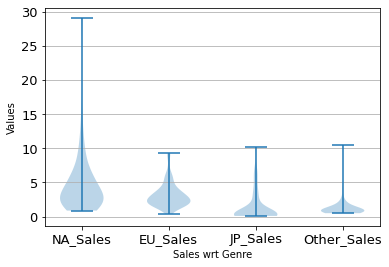

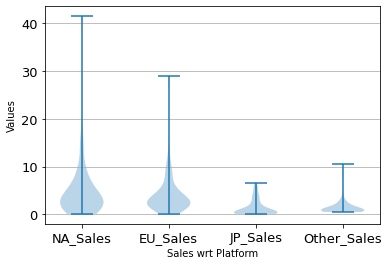

'In the above plots we see the relation of the categorical feature genre and platform as a whole with each of the sales feature respectively. The ends of the each violin specifies the minimum and maximum value and the width of the shade around the violin specifies the frequency of occurence of the corresponding value.'

In [103]:
fig, ax = plt.subplots()
ax.violinplot(df_sales_g.values)
xticklabels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Sales wrt Genre')
ax.set_ylabel('Values')
ax.yaxis.grid(True)
plt.show()


fig, ax = plt.subplots()
ax.violinplot(df_sales_pf.values)
xticklabels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Sales wrt Platform')
ax.set_ylabel('Values')
ax.yaxis.grid(True)
plt.show()


"""In the above plots we see the relation of the categorical feature genre and platform as a whole with each of the sales feature respectively. The ends of the each violin specifies the minimum and maximum value and the width of the shade around the violin specifies the frequency of occurence of the corresponding value."""

' This is a plot that shows the correlation between every numerical feature in the data set. Lighter the shade stronger the reltionship between the variables. And from the below plot we can see that Global_sales is correlated with NA_sales and EU_sales strongly which implies these two features affect the global_sales most.On the other hand the release year has no correlation at all where as the JP_sales and Other_sales affect the Global_sales slightly. We cannot ignore the JP_sales and Other_sales completely as sometimes they might end up changing the statistics completely.'

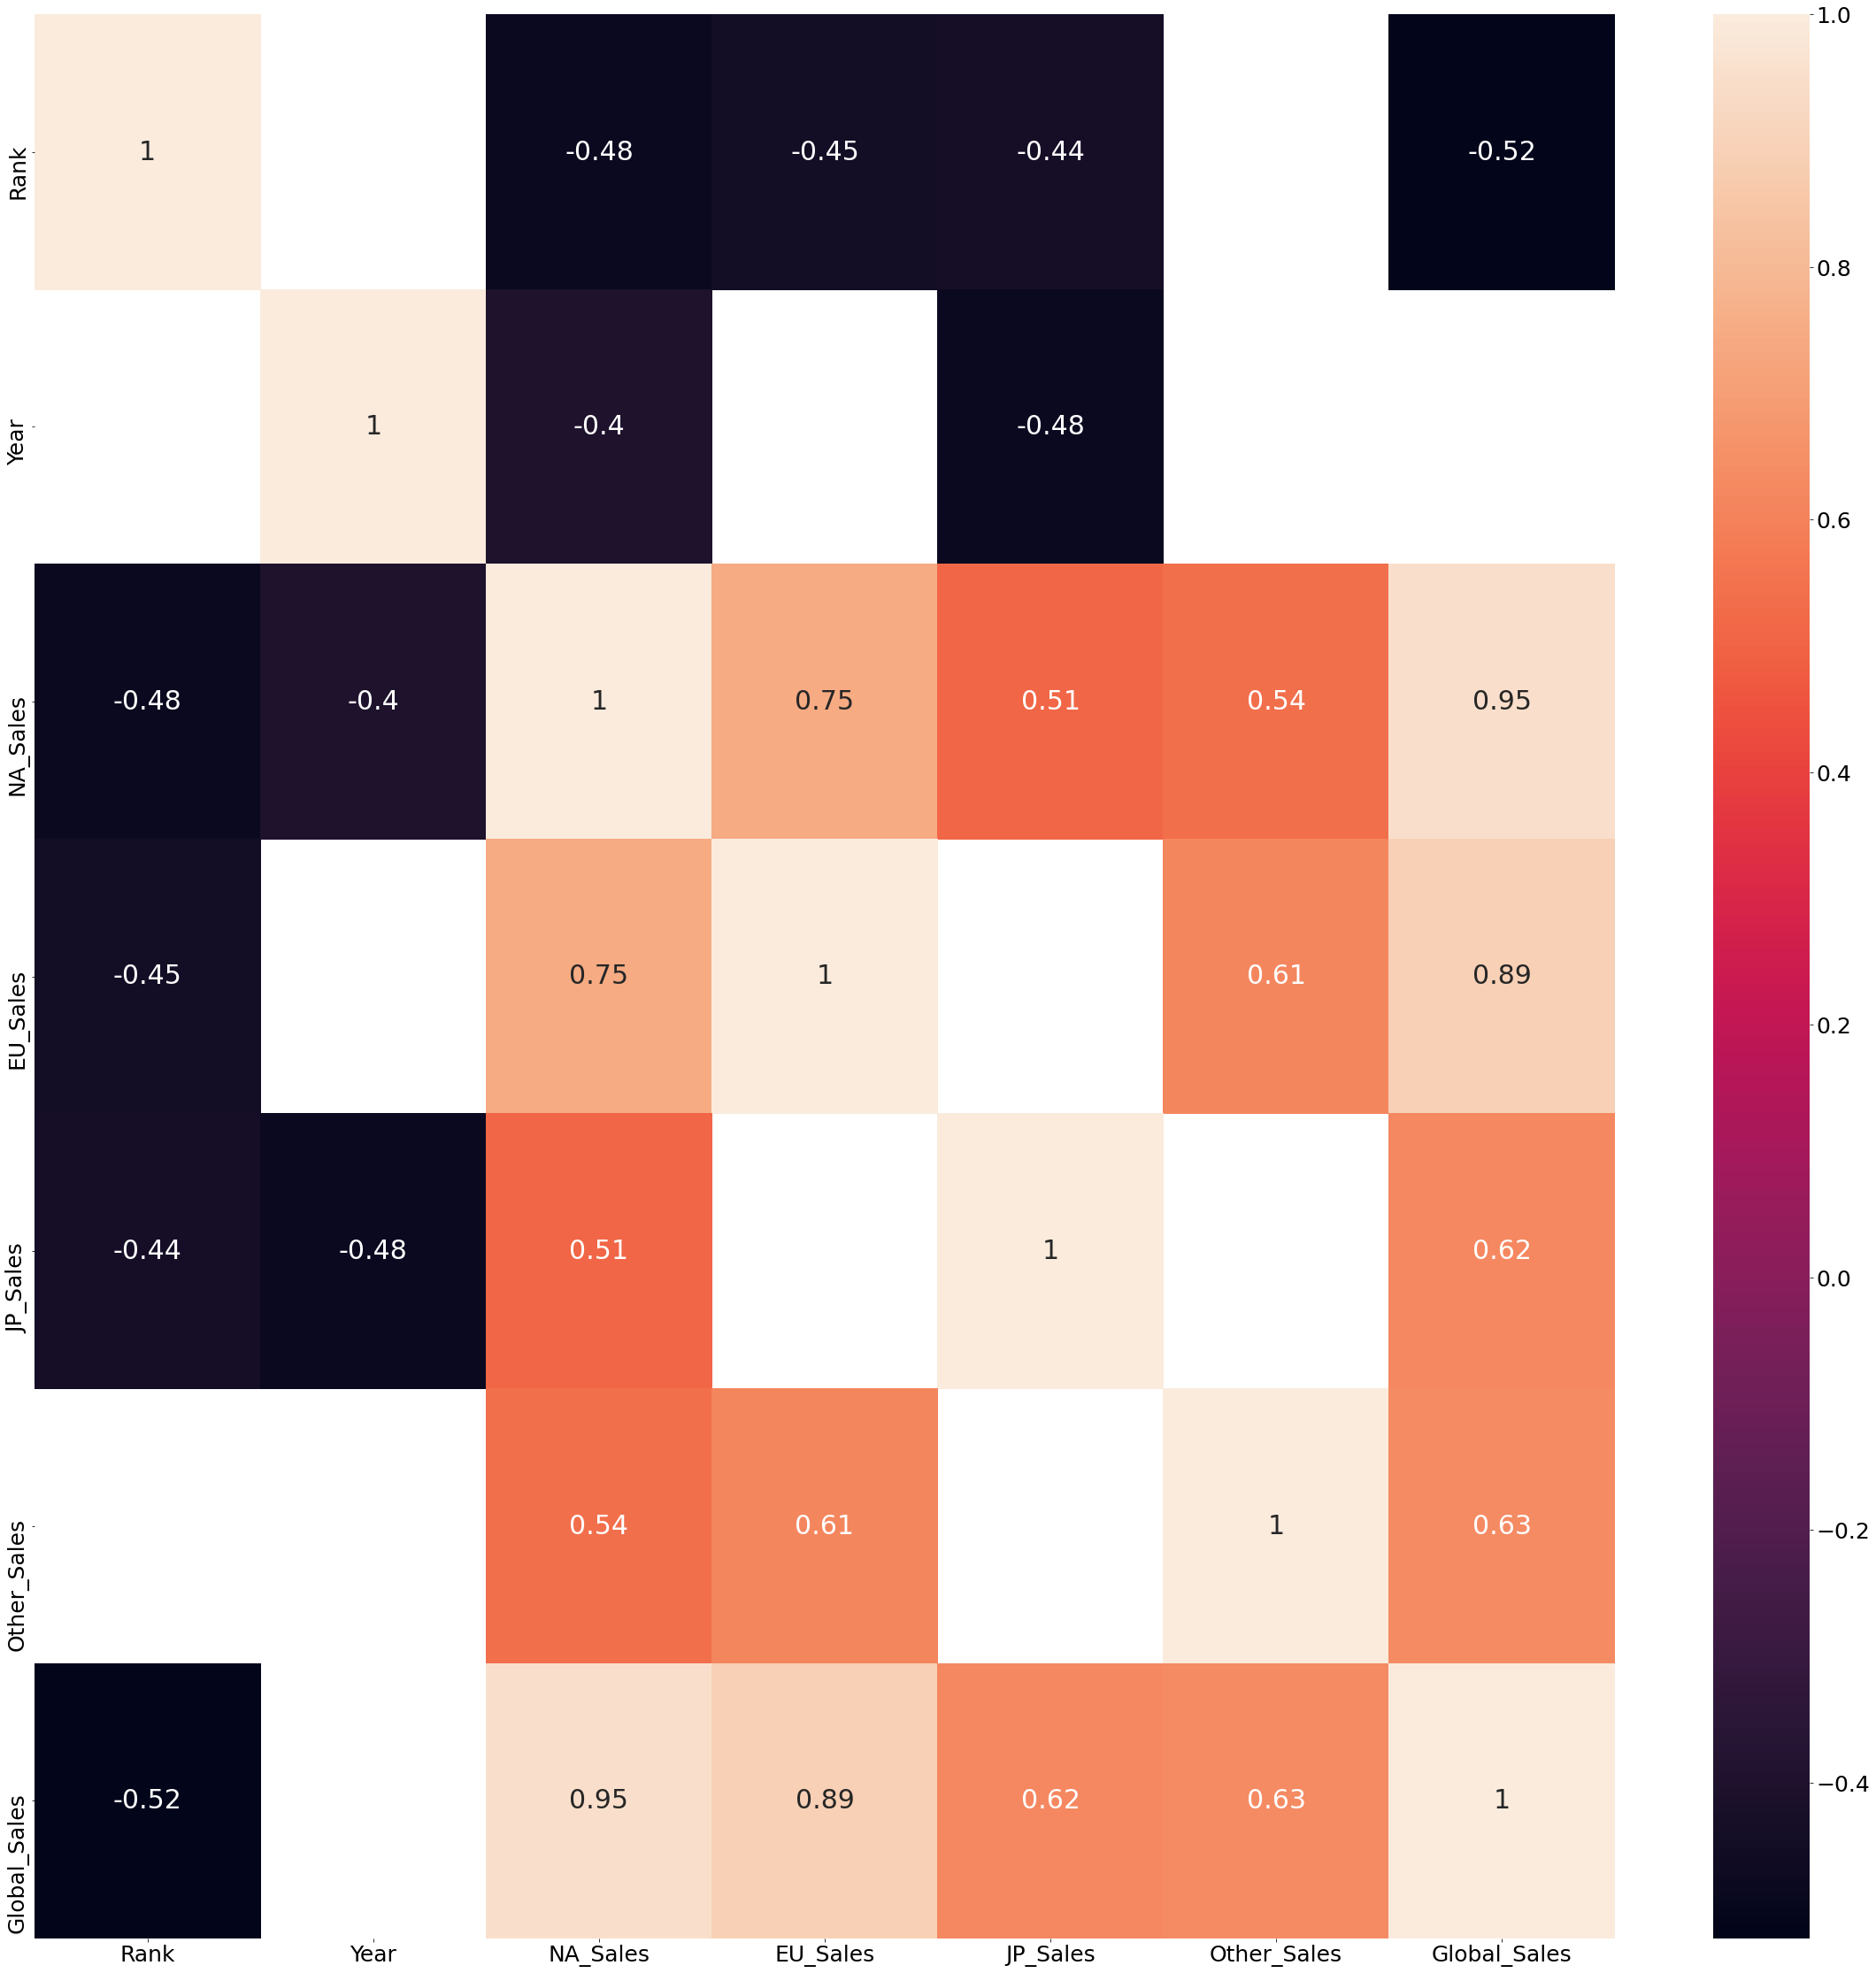

In [105]:
params = {'axes.titlesize':'25',
          'xtick.labelsize':'25',
          'ytick.labelsize':'25'}
plt.rcParams.update(params)
plt.figure(figsize = (40, 40))
df_cor = df.corr()
sns.heatmap(df_cor [(df_cor >= 0.5) | (df_cor <= -0.4)], 
           xticklabels=df_cor.columns.values, 
           yticklabels=df_cor.columns.values, 
           annot=True, annot_kws = {'fontsize' : 30})

""" This is a plot that shows the correlation between every numerical feature in the data set. Lighter the shade stronger the reltionship between the variables. And from the below plot we can see that Global_sales is correlated with NA_sales and EU_sales strongly which implies these two features affect the global_sales most.On the other hand the release year has no correlation at all where as the JP_sales and Other_sales affect the Global_sales slightly. We cannot ignore the JP_sales and Other_sales completely as sometimes they might end up changing the statistics completely."""  